# Molecular partition functions

This Notebook shows examples of various molecular partitions functions, e.g. contributions from rotation and vibration.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

plt.rcParams.update({"font.size": 12, "figure.figsize": [6.0, 4.0]})
from scipy.constants import h, c, k
from scipy.misc import derivative

## Two-level system

Here we consider a system where two energy level are possible; the ground state (0) and the first excited state, $\epsilon$. The partition function is

$$
q = 1+e^{-\epsilon / k_BT}
$$

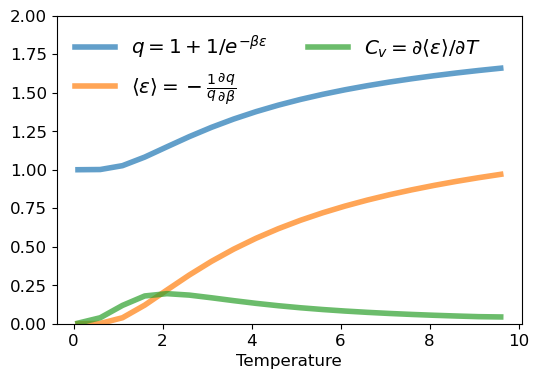

In [2]:
def q(T):
    return 1 + np.exp(-epsilon / (k * T))


def energy(T):
    return epsilon / (np.exp(epsilon / (k * T) + 1))  # atkins p625 (10th)


def Cv(T):
    return np.gradient(energy(T) / k, T[1] - T[0])


fig, ax = plt.subplots()
epsilon = k * 4
T = np.arange(0.1, 10, 0.5)
plt.plot(T, q(T), label=r"$q = 1+1 / e^{-\beta \epsilon}$", lw=4, alpha=0.7)
plt.plot(
    T,
    energy(T) / k,
    label=r"$\langle \epsilon \rangle = -\frac{1}{q}\frac{\partial q}{\partial \beta}$",
    lw=4,
    alpha=0.7,
)
plt.plot(
    T,
    Cv(T),
    label=r"$C_v=\partial \langle \epsilon \rangle / \partial T$",
    lw=4,
    alpha=0.7,
)
plt.legend(frameon=False, loc=0, fontsize="large", ncol=2)
plt.ylim(0, 2)
plt.xlabel("Temperature");

## Rotational Partition Function

The following plots the rotational partition function and how each quantum number, $J$, contributions. We use `ipywidgets` to add an interactive slider to control the temperature.
The manual for `ipywidgets` can be found [here](https://ipywidgets.readthedocs.io/en/latest/index.html).

In [3]:
B = 10.591 * 100  # 1/m # rotational wave-number (related to moment of inertia)
J = np.arange(0, 15, 1)  # quantum numbers (called "l" in Dill's book)

def q(J, beta):
    """rotational partition function for a given J"""
    return (2 * J + 1) * np.exp(-beta * h * c * B * J * (J + 1))


def qrot(beta):
    """partition function for "inifinite" number of quantum numbers"""
    J = np.arange(0, 500, 1)
    return np.sum(q(J, beta))


def qrotHT(beta):
    """partition function in the high temperature limit, i.e. summation --> integral"""
    return 1 / (beta * h * c * B)


def plot(T):
    """plots partition function at given temperature"""
    beta = 1 / (k * T)
    avg_energy = -derivative(qrot, beta, dx=0.001 * beta) / qrot(beta) * beta
    plt.plot(
        J,
        q(J, beta).cumsum(),
        "b--o",
        alpha=0.7,
        lw=2,
        ms=10,
        label=r"Explicit summation <$E$>={:.2f} kT".format(avg_energy),
    )

    plt.plot(
        [0, 1000],
        [qrotHT(beta), qrotHT(beta)],
        "r-",
        alpha=0.5,
        lw=4,
        label=r"High temperature limit <$E$>=1.00 kT",
    )

    plt.title("Rotational Partition Function, $q_r$")
    plt.xlabel("Quantum number, $J$")
    plt.ylabel("Summed partition function, $q$")
    plt.xlim(0, 14)
    plt.legend(loc=0, frameon=False)


# this part sets up a temperature slider to control the plot
i = interact(plot, T=(50, 1000), continuous_update=False)
i.widget.children[0].description = r"T (Kelvin)"

interactive(children=(IntSlider(value=525, description='T', max=1000, min=50), Output()), _dom_classes=('widge…

## Vibrational Partition Function

The exact vibrational partition function can be written as (see Dill Eq. 11.26):
$$
q_v = \frac{1}{1 - e^{-\theta_v/T}}
$$

where $\theta_v$ is the _vibrational temperature_.
The average energy is obtained by taking the derivative with respect to $T$, or if you prefer, $\beta$:
$$
\langle \epsilon \rangle = \frac{U}{N} = kT^2 \left( {\frac{\partial \ln q}{\partial T}} \right )
= -\left ( \frac{\partial \ln q }{\partial \beta} \right )
$$
See e.g. Dill and Bromberg, 2nd edition, Eq. 10.33.
The contribution to the heat capacity _per_ particle is
$$
c_v = \frac{C_v}{N} = \frac{\partial \langle \epsilon \rangle}{\partial T}
$$
In the high temperature limit (which is normally invalid for chemical bonds), each vibrational mode contributes with one $k_B$ to the heat capacity. This is because a classical, oscillating spring has two quadratic terms from potential and kinetic energy, respectively.

In [4]:
def cv_vib_numeric(T, theta):
    """
    Contribution to the heat capacity per molecule due to vibration (units of kB)
    This is the *lazy* way using Numpy's numerical differentiation function `np.gradient`.
    """
    dT = T[1] - T[0]  # Temperature spacing
    q_vib = 1 / (
        1 - np.exp(-theta / T)
    )  # Exact partition function, q(T), see Dill Eq. 11.6
    energy = (
        k * T**2 * np.gradient(np.log(q_vib), dT)
    )  # Average energy per particle,〈ε〉(units of Joules)
    return np.gradient(energy, dT) / k  # Heat capacity (units of kB)


def cv_vib_analytic(T, theta):
    """
    Contribution to the heat capacity per molecule due to vibration (units of kB)
    This is the analytic expression from double differentiation of the partition function
    """
    return (theta / T) ** 2 * np.exp(theta / T) / (np.exp(theta / T) - 1) ** 2

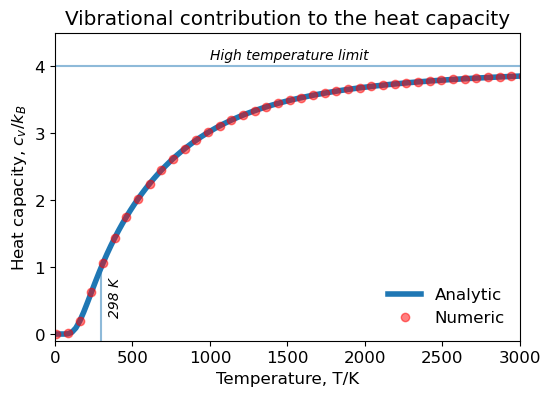

In [5]:
theta_range = [3360, 1890, 945, 945]  # Vibrational temperatures (K)
T = np.linspace(10, 5000, 200)  # Temperature interval (K)

# Sum contributions from several vibrational modes
cv_numeric = 0
cv_analytic = 0
for theta in theta_range:
    cv_numeric += cv_vib_numeric(T, theta)
    cv_analytic += cv_vib_analytic(T, theta)

plt.title("Vibrational contribution to the heat capacity")
plt.xlabel("Temperature, T/K")
plt.ylabel("Heat capacity, $c_v/k_B$")
plt.text(1000, 4.1, "High temperature limit", fontsize="small", style="italic")
plt.text(340, 0.3, "298 K", fontsize="small", style="italic", rotation=90)
plt.hlines(4, T.min(), T.max(), alpha=0.5)
plt.vlines(298, -1, 1, alpha=0.5)
plt.plot(T, cv_analytic, alpha=1.0, lw=4, label="Analytic")
plt.plot(T, cv_numeric, "ro", alpha=0.5, label="Numeric", markevery=3)
plt.xlim(0, 3000)
plt.ylim(-0.1, 4.5)
plt.legend(loc=4, frameon=False)
plt.show()

### Symbolic derivation using SymPy

Here we use symbolic differentiation using SymPy and obtain the same expression as used in the analytical solution above.
We also investigate $\lim_{T\rightarrow \infty} c_v(T)$ and show that it we indeed get $k_B$ as expected.

In [6]:
import sympy
from sympy import diff, exp, factor, limit, ln, oo

T, theta, k_B = sympy.symbols("T theta k_B", real=True, positive=True)
q = 1 / (1 - exp(-theta / T))
mean_energy = k_B * T**2 * diff(ln(q), T)
cv = factor(diff(mean_energy, T))
cv

k_B*theta**2*exp(theta/T)/(T**2*(exp(theta/T) - 1)**2)

In [7]:
limit(cv, T, oo)  # "oo" = infinity

k_B